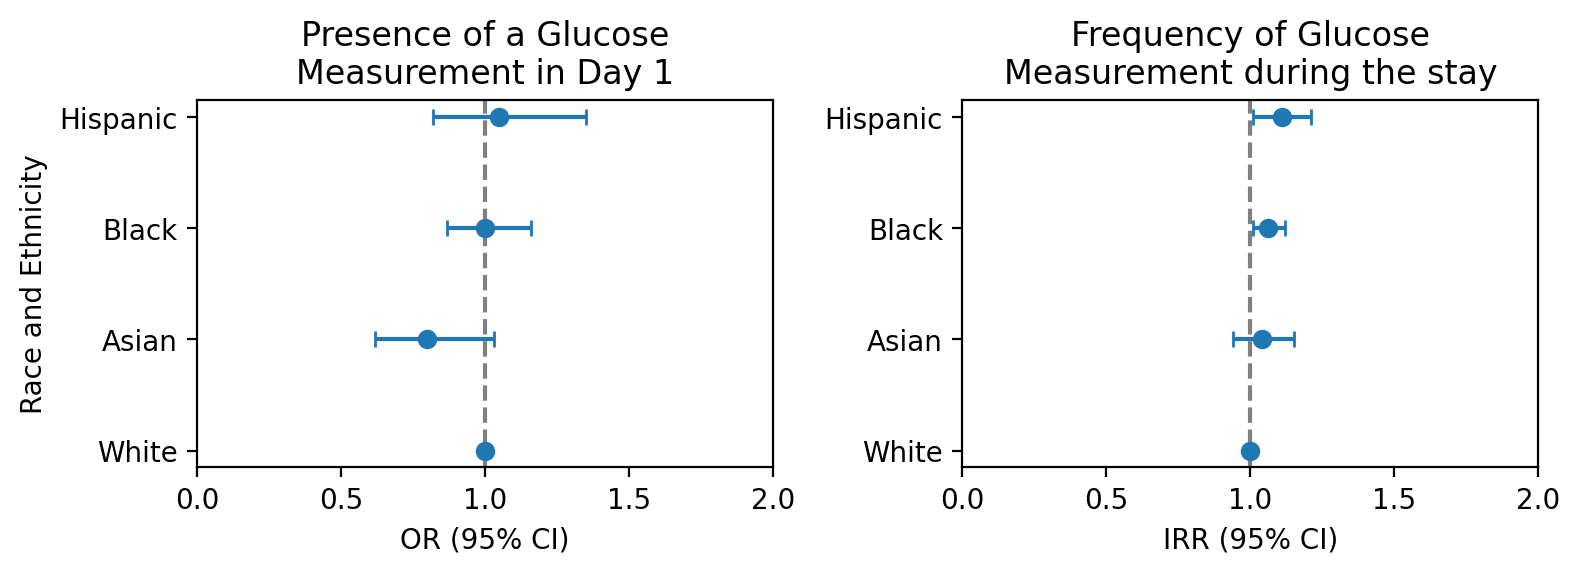

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend. figure_format = 'retina'

# From the results in the paper
df1 = pd.DataFrame({
    'Variable': ['White', 'Asian', 'Black', 'Hispanic'],
    'Odds Ratio': [1, 0.80, 1.00, 1.05],
    '2.5 % CI': [1, 0.62, 0.87, 0.82],
    '97.5 % CI': [1, 1.03, 1.16, 1.35]
})

df2 = pd.DataFrame({
    'Variable': ['White', 'Asian', 'Black', 'Hispanic'],
    'Odds Ratio': [1, 1.04, 1.06, 1.11],
    '2.5 % CI': [1, 0.94, 1.01, 1.01],
    '97.5 % CI': [1, 1.15, 1.12, 1.21]
})


# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Create forest plot for Logistic Regression
ax[0].errorbar(df1['Odds Ratio'],
               np.arange(len(df1)),
               xerr=[df1['Odds Ratio'] - df1['2.5 % CI'], df1['97.5 % CI'] - df1['Odds Ratio']],
               fmt='o',
               capsize=3,
               label='Logistic Regression')
ax[0].set_yticks(np.arange(len(df1)))
ax[0].set_yticklabels(df1['Variable'])
ax[0].set_title('Presence of a Glucose\nMeasurement in Day 1')
ax[0].set_xlabel('OR (95% CI)')
ax[0].axvline(x=1, linestyle='--', color='grey')
ax[0].set_xlim([0,2])
ax[0].set_ylabel("Race and Ethnicity")

# Create forest plot for Negative Binomial Regression
ax[1].errorbar(df2['Odds Ratio'], np.arange(len(df2)),
               xerr=[df2['Odds Ratio'] - df2['2.5 % CI'], df2['97.5 % CI'] - df2['Odds Ratio']],
               fmt='o',
               capsize=3,
               label='Negative Binomial Regression')
ax[1].set_yticks(np.arange(len(df2)))
ax[1].set_yticklabels(df2['Variable'])
ax[1].set_title('Frequency of Glucose\nMeasurement during the stay')
ax[1].set_xlabel('IRR (95% CI)')
ax[1].axvline(x=1, linestyle='--', color='grey')
ax[1].set_xlim([0,2])


# Show plot
plt.tight_layout()
plt.show()